迭代次数: 0, 当前温度: 1000.00, 当前解: x ≈ 2.645, 当前函数值: f(x) ≈ 3.794
迭代次数: 100, 当前温度: 950.00, 当前解: x ≈ 1.342, 当前函数值: f(x) ≈ 17.165
迭代次数: 200, 当前温度: 902.50, 当前解: x ≈ 2.001, 当前函数值: f(x) ≈ -11.683
迭代次数: 300, 当前温度: 857.38, 当前解: x ≈ 1.846, 当前函数值: f(x) ≈ -17.832
迭代次数: 400, 当前温度: 814.51, 当前解: x ≈ 1.667, 当前函数值: f(x) ≈ -9.232
迭代次数: 500, 当前温度: 773.78, 当前解: x ≈ 1.696, 当前函数值: f(x) ≈ -11.599
迭代次数: 600, 当前温度: 735.09, 当前解: x ≈ 0.764, 当前函数值: f(x) ≈ -16.355
迭代次数: 700, 当前温度: 698.34, 当前解: x ≈ 0.412, 当前函数值: f(x) ≈ 3.510
迭代次数: 800, 当前温度: 663.42, 当前解: x ≈ 0.136, 当前函数值: f(x) ≈ 13.444
迭代次数: 900, 当前温度: 630.25, 当前解: x ≈ 0.557, 当前函数值: f(x) ≈ -8.782
迭代次数: 1000, 当前温度: 598.74, 当前解: x ≈ 0.013, 当前函数值: f(x) ≈ 7.819
迭代次数: 1100, 当前温度: 568.80, 当前解: x ≈ 0.701, 当前函数值: f(x) ≈ -16.165
迭代次数: 1200, 当前温度: 540.36, 当前解: x ≈ 0.080, 当前函数值: f(x) ≈ 11.532
迭代次数: 1300, 当前温度: 513.34, 当前解: x ≈ 0.000, 当前函数值: f(x) ≈ 7.000
迭代次数: 1400, 当前温度: 487.67, 当前解: x ≈ 0.444, 当前函数值: f(x) ≈ 0.808
迭代次数: 1500, 当前温度: 463.29, 当前解: x ≈ 0.828, 当前函数值: f(x) ≈ -14.456
迭代

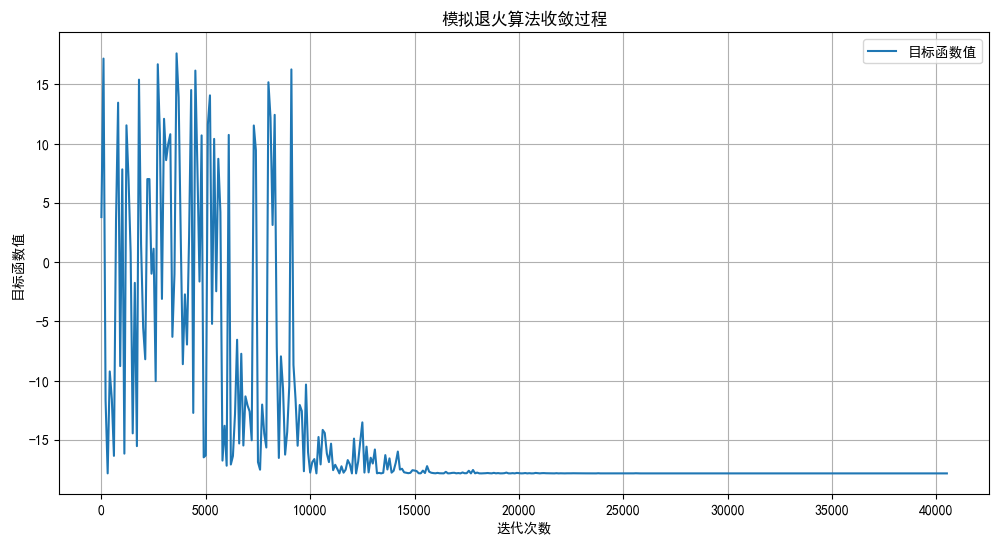

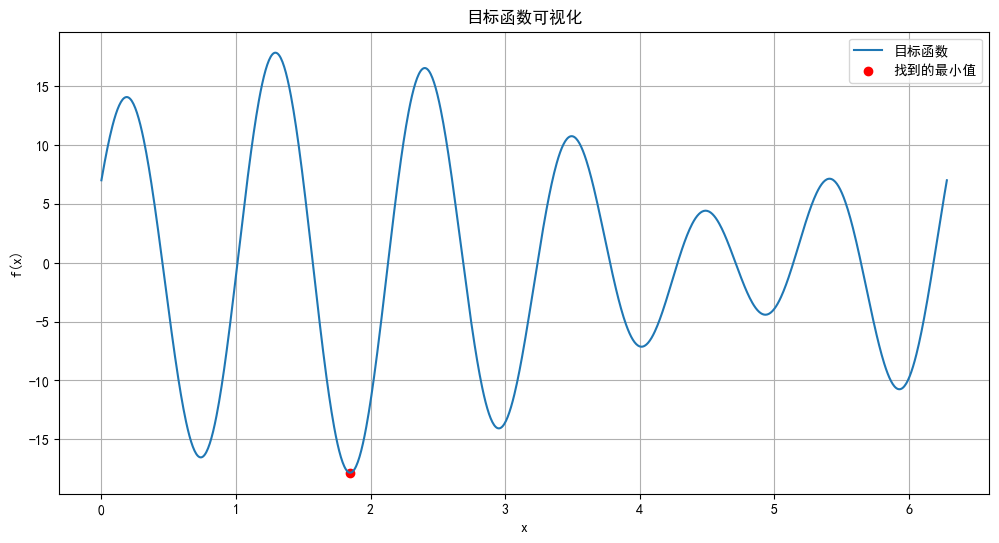

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

# 设置随机数种子以便复现结果
np.random.seed(2)

# 目标函数
def objective_function(x):
    return 11 * np.sin(6 * x) + 7 * np.cos(5 * x)

# 模拟退火算法
def simulated_annealing(obj_func, bounds, T0, T_end, K, L, step_size):
    # 初始化
    current_x = np.random.uniform(bounds[0], bounds[1])
    current_f = obj_func(current_x)
    
    best_x = current_x
    best_f = current_f
    
    T = T0
    iteration = 0
    
    history = []  # 记录优化过程

    while T > T_end:
        for _ in range(L):
            # 生成邻域解
            x_new = current_x + np.random.uniform(-step_size, step_size)
            x_new = max(min(x_new, bounds[1]), bounds[0])  # 确保在搜索范围内
            
            f_new = obj_func(x_new)
            
            # Metropolis准则
            delta_f = f_new - current_f
            if delta_f < 0 or np.random.rand() < math.exp(-delta_f / T):
                current_x = x_new
                current_f = f_new
                
                # 更新最优解
                if current_f < best_f:
                    best_x = current_x
                    best_f = current_f
                    
            # 记录当前状态
            if iteration % 100 == 0:
                print(f"迭代次数: {iteration}, 当前温度: {T:.2f}, 当前解: x ≈ {current_x:.3f}, 当前函数值: f(x) ≈ {current_f:.3f}")
                # 记录当前状态到历史列表
                history.append((iteration, T, current_x, current_f))
                
            iteration += 1
        
        # 降温
        T *= K

    # 添加最后一次迭代记录
    history.append((iteration, T, best_x, best_f))
    
    return best_x, best_f, history

# 参数设置
bounds = [0, 2 * np.pi]
T0 = 1000
T_end = 1e-6
K = 0.95
L = 100
step_size = 0.1

# 运行模拟退火算法
best_x, best_f, history = simulated_annealing(objective_function, bounds, T0, T_end, K, L, step_size)

# 打印结果
print(f"找到的最小值点 x ≈ {best_x:.3f}，对应函数值 f(x) ≈ {best_f:.3f}")

# 绘制收敛过程
iterations = [h[0] for h in history]
temperatures = [h[1] for h in history]
current_solutions = [h[2] for h in history]
current_values = [h[3] for h in history]

plt.figure(figsize=(12, 6))
plt.plot(iterations, current_values, label='目标函数值')
plt.xlabel('迭代次数')
plt.ylabel('目标函数值')
plt.title('模拟退火算法收敛过程')
plt.grid(True)
plt.legend()
plt.show()

# 可视化目标函数
x_vals = np.linspace(0, 2*np.pi, 1000)
y_vals = objective_function(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label='目标函数')
plt.scatter(best_x, best_f, color='red', label='找到的最小值')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('目标函数可视化')
plt.grid(True)
plt.legend()
plt.show()